In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

## Foreground

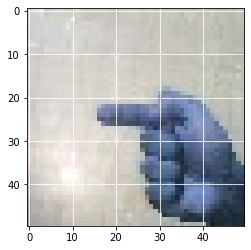

In [2]:
img = cv2.imread('img 36.jpg')
img = cv2.resize(img, (50,50))
# ret, img = cv2.threshold(img, 68, 255, cv2.THRESH_BINARY)
plt.imshow(img)
plt.grid(color='white')

## Background

True

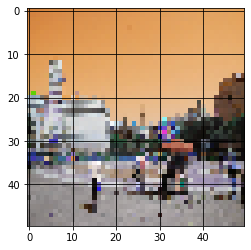

In [3]:
bg = cv2.imread('b7.jpg')
bg_res = cv2.resize(bg, (50,50))
plt.imshow(bg_res)
plt.grid(color='black')
cv2.imwrite('bg1.jpg', bg_res)

## Foreground Extraction

True

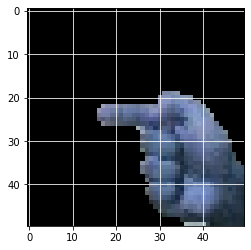

In [7]:
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (15,15,35,35)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,2,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_ = img*mask2[:,:,np.newaxis]

plt.imshow(img_)
plt.grid(color='white')
cv2.imwrite('e1.jpg', img_)

## Concatenating extracted foreground with background

True

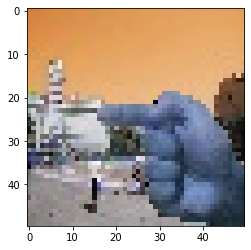

In [8]:
background_ = cv2.imread('bg1.jpg')
foreground = cv2.imread('e1.jpg')

row_f, col_f, channel_f = foreground.shape
background = cv2.resize(background_, (col_f, row_f))

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = foreground.shape
roi = background[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
foreground2gray = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)
# foreground2gray2blur = cv2.GaussianBlur(foreground2gray, (3,3), 0)
foreground2gray2blur = cv2.medianBlur(foreground2gray, 3)
ret, mask = cv2.threshold(foreground2gray2blur, 5, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
background_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
foreground_fg = cv2.bitwise_and(foreground, foreground, mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(background_bg, foreground_fg)
background[0:rows, 0:cols ] = dst

plt.imshow(background)
cv2.imwrite('c1.jpg',background)

## Final Transformations

In [ ]:
b_ls = []
f_ls = []

landscape = '/mnt/d4f6e37f-b51e-4cce-9bf9-bf48e0de6271/Others/ISL/FINAL_revised/background'
zero = '/mnt/d4f6e37f-b51e-4cce-9bf9-bf48e0de6271/Others/ISL/FINAL_revised/train/PRISONER'

filename = ''
for filename in os.listdir(landscape):
    file = os.path.join(landscape, filename)
    b_ls.append(file)

filename = ''
for filename in os.listdir(zero):
    file = os.path.join(zero, filename)
    f_ls.append(file)

    
for b,f in zip(b_ls, f_ls):
    background_ = cv2.imread(b)
    img = cv2.imread(f)
    img = cv2.resize(img, (50,50))
    
    mask = np.zeros(img.shape[:2],np.uint8)

    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    rect = (0,5,50,37)
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,10,cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img_ = img*mask2[:,:,np.newaxis]
    foreground = img_

    row_f, col_f, channel_f = foreground.shape
    background = cv2.resize(background_, (col_f, row_f))

    # I want to put logo on top-left corner, So I create a ROI
    rows,cols,channels = foreground.shape
    roi = background[0:rows, 0:cols ]

    # Now create a mask of logo and create its inverse mask also
    foreground2gray = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)
#     foreground2gray2blur = cv2.GaussianBlur(foreground2gray, (3,3), 0)
    foreground2gray2blur = cv2.medianBlur(foreground2gray, 3)
    ret, mask = cv2.threshold(foreground2gray2blur, 4, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)

    # Now black-out the area of logo in ROI
    background_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

    # Take only region of logo from logo image.
    foreground_fg = cv2.bitwise_and(foreground, foreground, mask = mask)

    # Put logo in ROI and modify the main image
    dst = cv2.add(background_bg, foreground_fg)
    background[0:rows, 0:cols ] = dst

    plt.imshow(background)
    cv2.imwrite(f, background)